In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize
import pandas as pd
import re
from bs4 import BeautifulSoup as bs
import requests
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
from pprint import pprint
import json

## Load Data

In [4]:
def load_data(title):
    with open(title,encoding='utf-8') as f:
        return json.load(f)

In [5]:
realestate_kh = "./data/realestate_kh.json"
realestate_kh_list = load_data(realestate_kh)

In [6]:
realestate_kh_list

[{'name': None,
  'location': None,
  'category': None,
  'price': None,
  'infos': '[]'},
 {'name': 'Villa for Sale in Siem Reap-Kon Deak Borey Tourism siem reap',
  'location': 'Villa for Sale in Siem Reap-Kon Deak Borey Tourism siem reapFeaturedFor sale\n\nVilla$130,000  Kandaek, Prasat Bakong, Siem Reap\ue920 Bedrooms: 33\ue91f Bathrooms: 33\ue93f Land area: 240m²240m² Updated: 1\xa0week agoDaBest Properties Cambodia Co., Ltd',
  'category': 'Villa',
  'price': '$130,000',
  'infos': '[<span class="label">Bedrooms: 3</span>, <span class="label">Bathrooms: 3</span>, <span class="label">Land area: 240m²</span>]'},
 {'name': 'Land for Sale in\u200b Krong Siem Reap-Sangkat Chreav ',
  'location': 'Land for Sale in\u200b Krong Siem Reap-Sangkat Chreav FeaturedFor saleLand$59,150  Chreav, Siem Reap, Siem Reap\ue93f Land area: 455m²455m² Updated: 1\xa0week agoDaBest Properties Cambodia Co., Ltd',
  'category': 'Land',
  'price': '$59,150',
  'infos': '[<span class="label">Land area: 455m²

In [7]:
df = json_normalize(realestate_kh_list)

df

,name,location,category,price,infos
0,None,None,None,None,[]
1,Villa for Sale in Siem Reap-Kon Deak Borey Tou...,Villa for Sale in Siem Reap-Kon Deak Borey Tou...,Villa,"$130,000","[<span class=""label"">Bedrooms: 3</span>, <span..."
2,Land for Sale in​ Krong Siem Reap-Sangkat Chreav,Land for Sale in​ Krong Siem Reap-Sangkat Chre...,Land,"$59,150","[<span class=""label"">Land area: 455m²</span>]"
3,Spacious 2Bedroom Condo For Sale in Olympia City,Spacious 2Bedroom Condo For Sale in Olympia Ci...,Condo,"$220,000","[<span class=""label"">Bedrooms: 2</span>, <span..."
4,DABEST PROPERTIES: Luxuxry Villa for Sale in S...,DABEST PROPERTIES: Luxuxry Villa for Sale in S...,Villa,"$550,000","[<span class=""label"">Bedrooms: 6</span>, <span..."
...,...,...,...,...,...
1045,None,J Tower 1 Modern Style of Condominium For Sale...,Condo,"$120,000","[<span class=""label"">Bedrooms: 1</span>, <span..."
1046,None,"Villa For SaleFor saleVilla$285,000 Phnom Pe...",Villa,"$285,000","[<span class=""label"">Bedrooms: 4</span>, <span..."
1047,None,DAKA KUN REALTY: House for Sale in Siem Reap -...,House,"$120,000","[<span class=""label"">Bedrooms: 3</span>, <span..."
1048,None,"1 Bedroom Condo For Sale - Golden 1, Phnom Pen...",Condo,"$90,000","[<span class=""label"">Bedrooms: 1</span>, <span..."


In [8]:
# df.set_index('location', inplace=True)


getPrice = df["price"].str.split("$", n = 1, expand = True)

# print(getPrice[1])
df["price"] = getPrice[1]

df

,name,location,category,price,infos
0,None,None,None,None,[]
1,Villa for Sale in Siem Reap-Kon Deak Borey Tou...,Villa for Sale in Siem Reap-Kon Deak Borey Tou...,Villa,"130,000","[<span class=""label"">Bedrooms: 3</span>, <span..."
2,Land for Sale in​ Krong Siem Reap-Sangkat Chreav,Land for Sale in​ Krong Siem Reap-Sangkat Chre...,Land,"59,150","[<span class=""label"">Land area: 455m²</span>]"
3,Spacious 2Bedroom Condo For Sale in Olympia City,Spacious 2Bedroom Condo For Sale in Olympia Ci...,Condo,"220,000","[<span class=""label"">Bedrooms: 2</span>, <span..."
4,DABEST PROPERTIES: Luxuxry Villa for Sale in S...,DABEST PROPERTIES: Luxuxry Villa for Sale in S...,Villa,"550,000","[<span class=""label"">Bedrooms: 6</span>, <span..."
...,...,...,...,...,...
1045,None,J Tower 1 Modern Style of Condominium For Sale...,Condo,"120,000","[<span class=""label"">Bedrooms: 1</span>, <span..."
1046,None,"Villa For SaleFor saleVilla$285,000 Phnom Pe...",Villa,"285,000","[<span class=""label"">Bedrooms: 4</span>, <span..."
1047,None,DAKA KUN REALTY: House for Sale in Siem Reap -...,House,"120,000","[<span class=""label"">Bedrooms: 3</span>, <span..."
1048,None,"1 Bedroom Condo For Sale - Golden 1, Phnom Pen...",Condo,"90,000","[<span class=""label"">Bedrooms: 1</span>, <span..."


In [ ]:
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].str.replace('/m²','')

category
Apartment               AxesSubplot(0.125,0.11;0.775x0.77)
ApartmentPOA            AxesSubplot(0.125,0.11;0.775x0.77)
Borey                   AxesSubplot(0.125,0.11;0.775x0.77)
Condo                   AxesSubplot(0.125,0.11;0.775x0.77)
Flat                    AxesSubplot(0.125,0.11;0.775x0.77)
Flat House              AxesSubplot(0.125,0.11;0.775x0.77)
House                   AxesSubplot(0.125,0.11;0.775x0.77)
Land                    AxesSubplot(0.125,0.11;0.775x0.77)
LandPOA                 AxesSubplot(0.125,0.11;0.775x0.77)
Link House              AxesSubplot(0.125,0.11;0.775x0.77)
Project                 AxesSubplot(0.125,0.11;0.775x0.77)
Residential Property    AxesSubplot(0.125,0.11;0.775x0.77)
Serviced Apartment      AxesSubplot(0.125,0.11;0.775x0.77)
Shophouse               AxesSubplot(0.125,0.11;0.775x0.77)
Studio                  AxesSubplot(0.125,0.11;0.775x0.77)
Twin Villa              AxesSubplot(0.125,0.11;0.775x0.77)
Villa                   AxesSubplot(0.125,0.11;

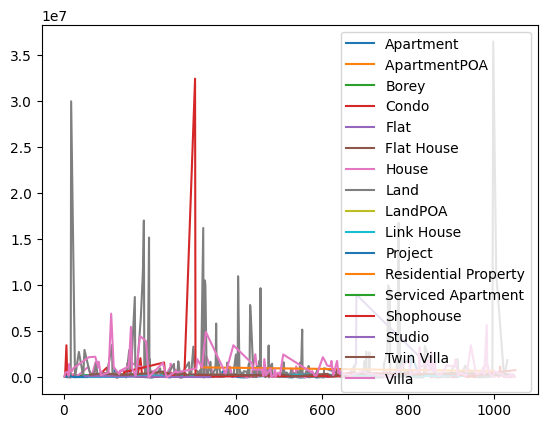

In [54]:
df['price']= df['price'].astype(float)

df.groupby('category')['price'].plot(legend=True)
